# 1 Operações com espaços de cor

## 1.1 Fatiamento

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from skimage.filters.rank import otsu
from skimage.filters import threshold_otsu as t_otsu, try_all_threshold as tall
from skimage.morphology import disk, ball, square
from skimage import io,img_as_float, img_as_ubyte,color
from skimage.exposure import histogram
from skimage.color import rgb2hsv,rgb2yuv

In [4]:
def data_info(img):
    print(f"Classe: {type(img)}")
    print(f"Tipo de variável: {img.dtype}")
    print(f"Min, max: {img.min(),img.max()}")
    print(f"Dimensões: {img.shape}")

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (40, 204)
Dimensões: (256, 256)


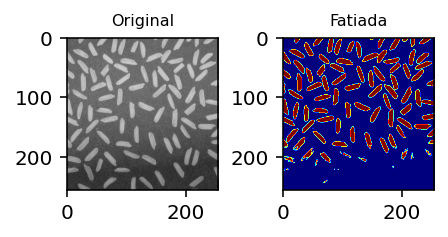

In [21]:
#%Fatiamento de intensidade
#%Usando duas classes para segmentar a imagem de uma placa
Get = io.imread('rice.png')
data_info(Get)

#%Definindo um limiar para o fatiamento
Limiar  = 100
Dados   = Get > 150
#Dados   = double(Dados);%convertendo em double pra fazer a operação aritmetica
#Fundo   = 1 - Dados;
fig,ax = plt.subplots(1,2,figsize=(3,3),constrained_layout=True)
ax[0].imshow(Get,vmin=0,vmax=255,cmap='gray')
ax[0].set_title("Original",fontsize=8)
ax[1].imshow(Dados,cmap='jet')
ax[1].set_title("Fatiada",fontsize=8); 

## 1.2 Transformação de RGB para CMY

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (391, 518, 3)


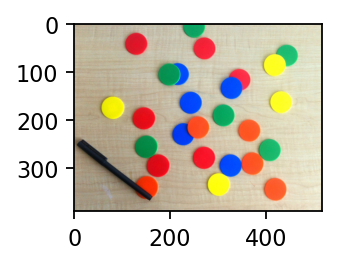

In [32]:
chips = io.imread('coloredChips.png')
plt.figure(figsize=(2, 2), dpi=80)
plt.imshow(chips,cmap='gray')
data_info(chips)

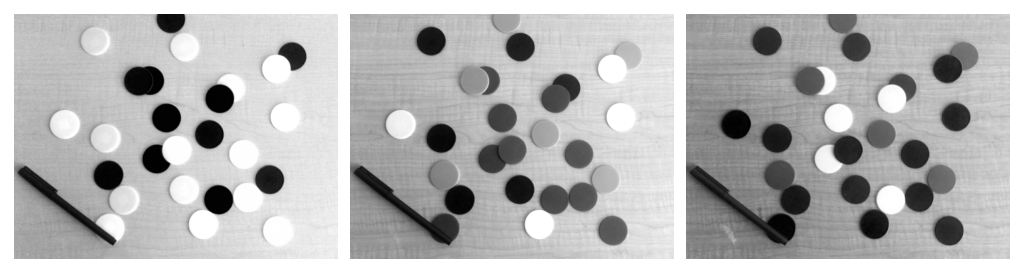

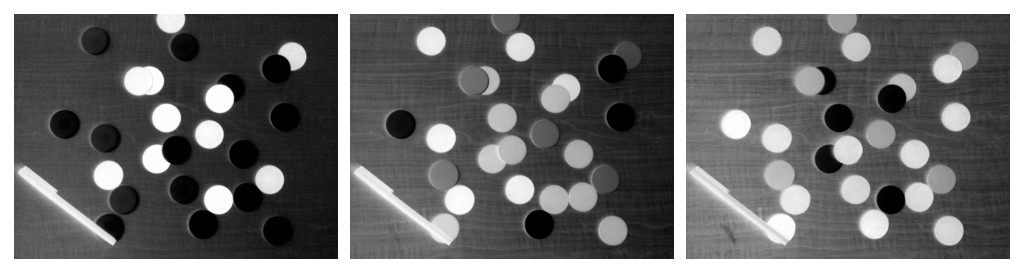

In [38]:
#Separando as bandas
r = chips[:,:,0]# no python, índice começa em 0!
g = chips[:,:,1]
b = chips[:,:,2]

#%normalizando em [0,1]
r = img_as_float(r)
g = img_as_float(g)
b = img_as_float(b)

#Criando subplots
f, axes = plt.subplots(1, 3, figsize=(7, 7),constrained_layout=True)
axes[0].imshow(r,cmap='gray')
axes[1].imshow(g,cmap='gray')
axes[2].imshow(b,cmap='gray')

#Posso esconder os vamores de pixels nos eixos
for ax in axes:
    ax.axis('off')

#%Componetes CMY
C = 1 - r
M = 1 - g
Y = 1 - b

f, axes = plt.subplots(1, 3, figsize=(7, 7),constrained_layout=True)
axes[0].imshow(C,cmap='gray')
axes[1].imshow(M,cmap='gray')
axes[2].imshow(Y,cmap='gray')

for ax in axes:
    ax.axis('off')




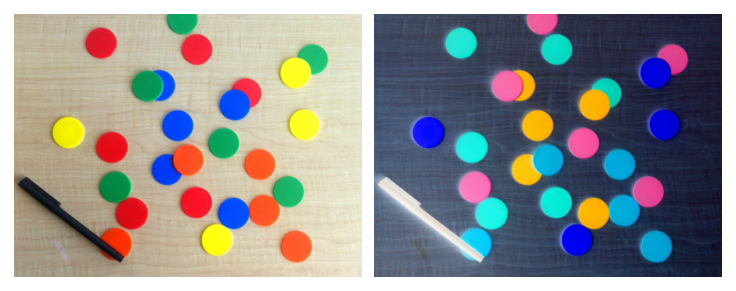

In [39]:
#Recompondo
comp_cor = np.stack([C, M, Y],axis=2)

f, axes = plt.subplots(1, 2, figsize=(5, 5),constrained_layout=True)
axes[0].imshow(chips,cmap='gray')
axes[1].imshow(comp_cor,cmap='gray')

for ax in axes:
    ax.axis('off')

## 1.3 Conversão de RGB para HSV e YUV

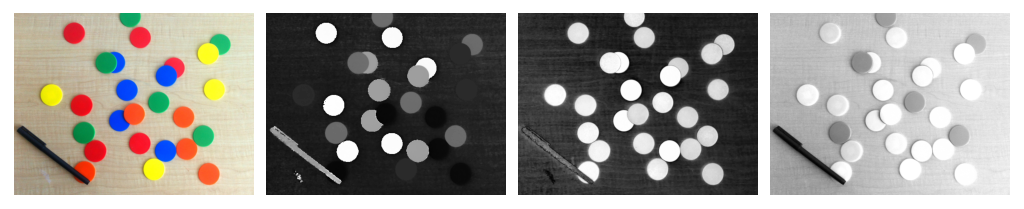

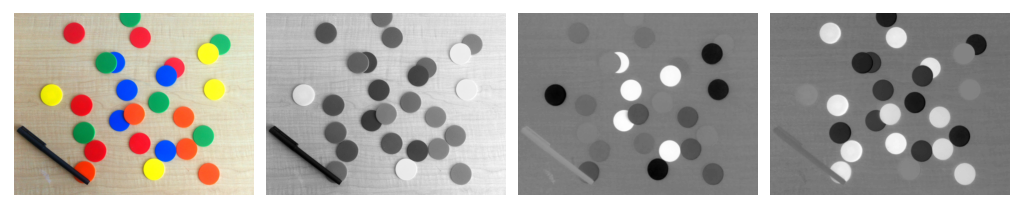

In [50]:
img_hsv = rgb2hsv(chips)
img_yuv = rgb2yuv(chips)

f, axes = plt.subplots(1, 4, figsize=(7, 7),constrained_layout=True)
axes[0].imshow(chips,cmap='gray')
axes[1].imshow(img_hsv[:,:,0],cmap='gray')
axes[2].imshow(img_hsv[:,:,1],cmap='gray')
axes[3].imshow(img_hsv[:,:,2],cmap='gray')

for ax in axes:
    ax.axis('off')

f, axes = plt.subplots(1, 4, figsize=(7, 7),constrained_layout=True)
axes[0].imshow(chips,cmap='gray')
axes[1].imshow(img_yuv[:,:,0],cmap='gray')
axes[2].imshow(img_yuv[:,:,1],cmap='gray')
axes[3].imshow(img_yuv[:,:,2],cmap='gray')

for ax in axes:
    ax.axis('off')